In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *
import imageio
from mpl_toolkits.mplot3d import axes3d

In [2]:
a_x = 0                           ## Limites del espacio-tiempo 
b_x = 100

a_y = 0                           
b_y = 100

a_t = 0                         
b_t = 1

n = 150                      ## Numero de particiones

s = 15
x0 = 30
y0 = 30

x = np.zeros(n) 
y = np.zeros(n)
t = np.zeros(n)
        
dx = (b_x-a_x)/(n-1)                ## Malla en el espacio
dy = (b_y-a_y)/(n-1)                ## Malla en el espacio
dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo


for w in range(0,n):
    x[w] = a_x + dx*w                     ## Posicion sobre la malla
    y[w] = a_y + dy*w                     ## Posicion sobre la malla
    t[w] = a_t + dt*w                     ## Tiempo

xx = x
yy = y

def f(x,y):
    f = np.exp(-((x-x0)**2 + (y-y0)**2)/(2*s))*10
    return f

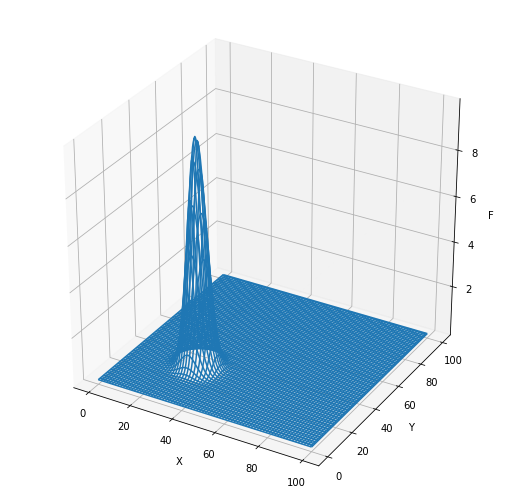

In [3]:
x,y = np.meshgrid(x,y)
F = f(x,y)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.plot_wireframe(x,y,F, rstride = 2, cstride = 2, cmap = 'Blues')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
plt.show()                                                   # Mostramos el gráfico

In [4]:
def h(x,y):                            

    s = 15
    x0 = 30
    y0 = 30
    u = np.zeros((n,n,n)) 
    vx = 8                             ## Velocidad en X
    vy = 4                             ## Velocidad en Y
    
    for i in range(0,n-1):
        for j in range(0,n-1):
            u[i][j][0] =np.exp(-((xx[i]-x0)**2 + (yy[j]-y0)**2)/(2*s))
            
    for k in range(0,n-1):         ## Tiempo                           
        for m in range(1,n-1):                ## Espacio en x
            for l in range(1,n-1):                ## Espacio en y
                u[m][l][k+1] = u[m][l][k] - (vx*dt/(2*dx))*(u[m+1][l][k] - u[m-1][l][k]) - (vy*dt/(2*dy))*(u[m][l+1][k] - u[m][l-1][k])
    return u 


In [5]:
def gif1(u,s):  ## Estoy generando las n imagenes para el gif  
    
    filenames1 = []        ## x:Posicion   u: Posicion en el tiempo   s: # Imagenes 
    
    for i in range(0,s):
        plt.figure(figsize=(7,7))
        plt.title('t =' +str(round(10*i))+ 's')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.pcolor(u[:,:,10*i], cmap='RdBu')
        plt.savefig(str(i)+'1.png')
        filenames1 += [str(i)+'1.png']
        
    images1 = []                     ## Estoy uniendo las imagenes para el gif 

    for filename in filenames1:
        images1.append(imageio.imread(str(filename)))
    imageio.mimsave('Movie1.gif',images1,duration = 0.5)

In [6]:
def gif2(u,s):  ## Estoy generando las n imagenes para el gif  
    
    filenames2 = []        ## x:Posicion   u: Posicion en el tiempo   s: # Imagenes 
    
    for i in range(0,s):
        plt.figure(figsize=(7,7))
        ax = plt.axes(projection='3d')
        plt.title('t =' +str(round(10*i))+ 's')
        plt.xlabel('X')
        plt.ylabel('Y')
        surf = ax.plot_surface(xx,yy, u[:,:,10*i], rstride=1, cstride=1, cmap='Spectral', edgecolor='none')
        
        plt.savefig(str(i)+'2.png')
        filenames2 += [str(i)+'2.png']
        
    images2 = []                     ## Estoy uniendo las imagenes para el gif 

    for filename in filenames2:
        images2.append(imageio.imread(str(filename)))
    imageio.mimsave('Movie2.gif',images2,duration = 0.5)

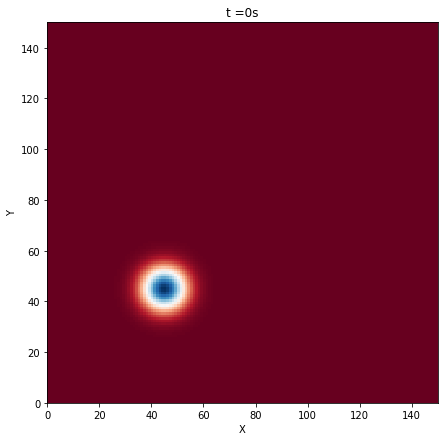

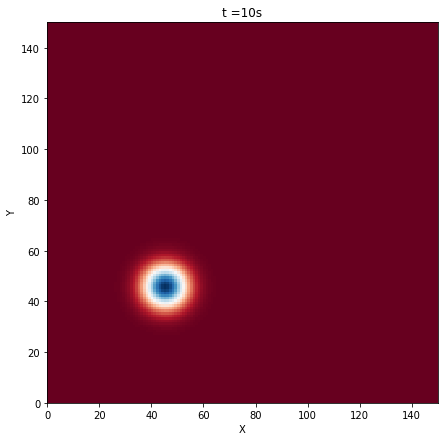

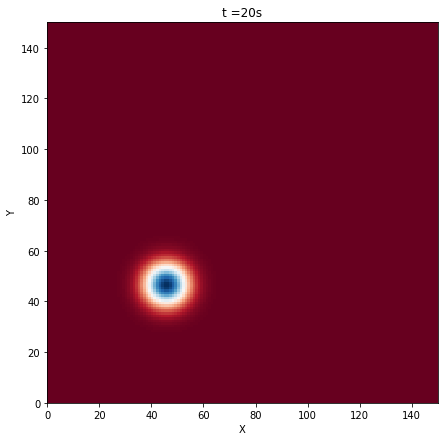

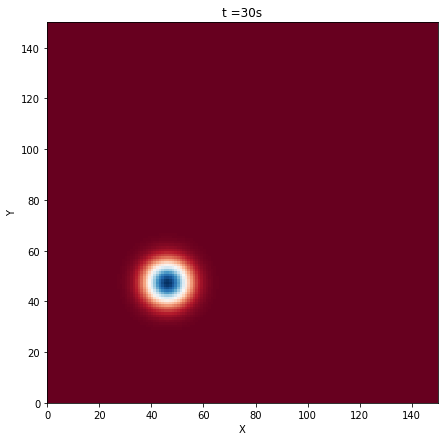

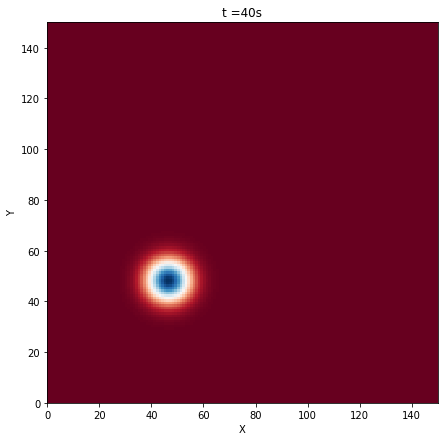

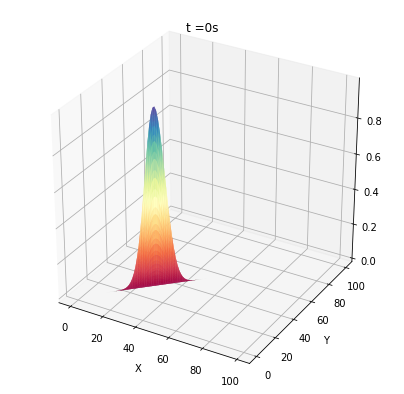

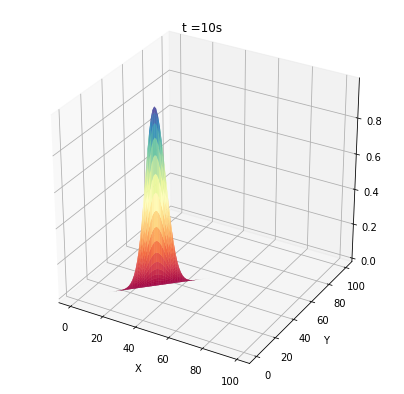

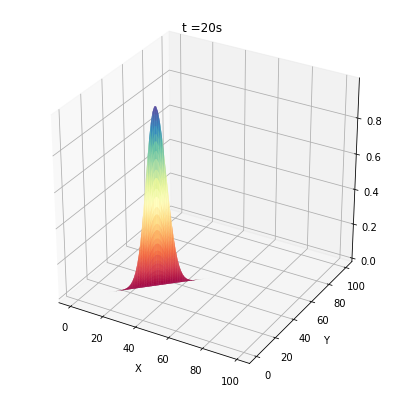

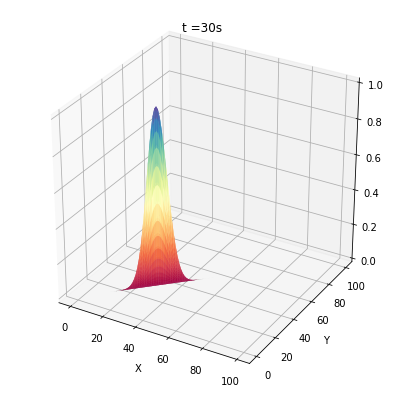

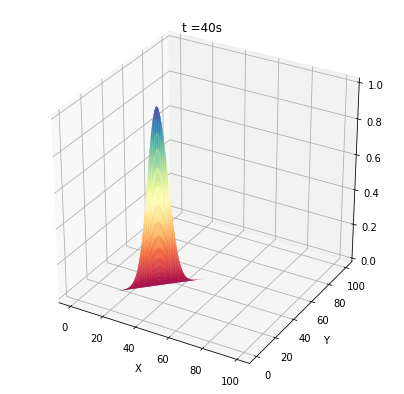

In [7]:
gif1(h(xx,yy),5)
gif2(h(xx,yy),5)